Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import Data

In [2]:
df = pd.read_csv("IMDB-Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
print("Summary statistics of numerical features : \n", df.describe())
print("\nTotal number of reviews: ",len(df))
print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))
df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Summary statistics of numerical features : 
                                                    review sentiment
count                                                4000      4000
unique                                               3998         2
top     My favourite police series of all time turns t...  negative
freq                                                    2      2027

Total number of reviews:  4000

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
3995,"Starting off, here's a synopsis: Porno queen A...",1
3996,He pulled the guys guts out his butt! That's a...,0
3997,This movie promised bat people. It didn't deli...,0
3998,"I saw the film many times, and every time I am...",0


Data Visualization

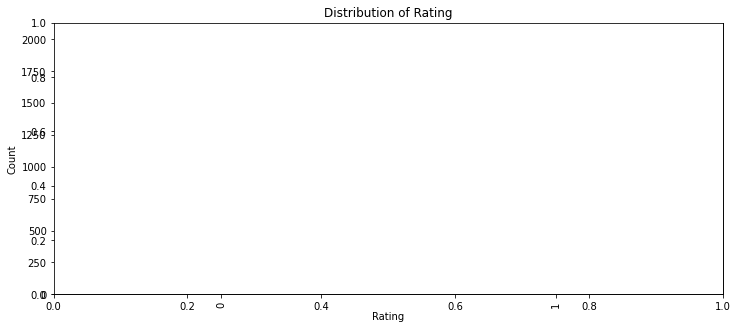

In [4]:
plt.figure(figsize=(12,5))
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

Data Preparation

In [5]:
df = df.sample(frac=0.1, random_state=0) 
df.dropna(inplace=True)
df

,review,sentiment
2230,When thinking of the revelation that the main ...,0
668,This must have been one of the worst movies I ...,0
3616,A group of tourists are stranded on Snake Isla...,0
2363,"Silly movie is really, really funny. Yes, it's...",1
142,After hearing about George Orwell's prophetic ...,0
...,...,...
2895,Excellent episode movie ala Pulp Fiction. 7 da...,1
2140,The Bone Snatcher is about a group miners who ...,0
3599,"Well, to each his own, but I thought Gibson's ...",0
2567,"In my analysis of ""Trois couleurs: Blanc"" I wr...",1


Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)
print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 360 training examples and 40 validation examples. 

Show a review in the training set : 
 Made and released at the time when the internet was just becoming huge, this is a storyline Hitchcock would have loved.<br /><br />Sadly, Hitchcock wasn't around to make it, and we're left with an occasionally suspenseful but mostly silly thriller, that is held (barely) together by Bullock's intelligence.<br /><br />It was released in 1995 but is already dated, and the amount of mistakes and inaccuaracies regarding computers must be seen to be believed, and you don't even have to be a dot.com person to spot them!


(2933    A Scanner Darkly, Minority Report, Blade Runne...
 352     Tell the truth I’m a bit stun to see all these...
 1791    **Might contain spoilers**<br /><br />Ok, lets...
 668     This must have been one of the worst movies I ...
 2278    I like science-fiction movies and even, low-ra...
                               ...                        
 1888    Absolutely nothing is redeeming about this tot...
 2390    WWE has produced some of the worst pay-per-vie...
 1069    My comment is mainly a comment on the first co...
 1593    This is indeed the film that popularized kung ...
 751     They must issue this plot outline to all wanna...
 Name: review, Length: 360, dtype: object,
 2933    1
 352     0
 1791    0
 668     0
 2278    0
        ..
 1888    0
 2390    1
 1069    1
 1593    0
 751     0
 Name: sentiment, Length: 360, dtype: int32)

Bag of Words
Step 1 : Preprocess raw reviews to cleaned reviews

Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn

Step 3 : Transform review text to numerical representations (feature vectors)

Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)

Step 5 : Improve the model performance by GridSearch

Text Preprocessing
Step 1 : remove html tags using BeautifulSoup

Step 2 : remove non-character such as digits and symbols

Step 3 : convert to lower case

Step 4 : remove stop words such as "the" and "and" if needed

Step 5 : convert to root words by stemming if needed



In [7]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    return( " ".join(words))

In [8]:
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 made and released at the time when the internet was just becoming huge this is a storyline hitchcock would have loved sadly hitchcock wasn t around to make it and we re left with an occasionally suspenseful but mostly silly thriller that is held barely together by bullock s intelligence it was released in but is already dated and the amount of mistakes and inaccuaracies regarding computers must be seen to be believed and you don t even have to be a dot com person to spot them


CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features: %d \n" % len(countVect.get_feature_names_out()))
print("Show some feature names: \n", countVect.get_feature_names_out()[::1000])
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features: 10208 

Show some feature names: 
 ['aaargh' 'bodies' 'corny' 'engrained' 'hackett' 'klein' 'nearby' 'props'
 'severely' 'teens' 'wildlife']


MultinomialNB()

In [14]:
import pickle
pickle.dump(countVect,open('countVect_imdb.pkl','wb'))

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [22]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.7500

AUC score : 0.7444

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.80      0.63      0.71        19

    accuracy                           0.75        40
   macro avg       0.76      0.74      0.74        40
weighted avg       0.76      0.75      0.75        40


Confusion Matrix : 
 [[18  3]
 [ 7 12]]


In [17]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))

TfidfVectorizer with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5) 
X_train_tfidf = tfidf.fit_transform(X_train)

feature_names = tfidf.get_feature_names_out()

print("Number of features: %d \n" % len(feature_names))
print("Show some feature names: \n", feature_names[::1000])

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)


Number of features: 1666 

Show some feature names: 
 ['10' 'normal']


LogisticRegression()

In [19]:
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['bad' 'worst' 'like' 'br' 'plot' 'no' 'even' 'awful' 'terrible' 'could']

Top 10 features with largest coefficients : 
['and' 'great' 'love' 'is' 'film' 'it' 'of' 'wonderful' 'other' 'always']


In [20]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8750

AUC score : 0.8784

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.82      0.95      0.88        19

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40


Confusion Matrix : 
 [[17  4]
 [ 1 18]]


In [21]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)
params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.8250

AUC score : 0.8208

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.88      0.74      0.80        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40


Confusion Matrix : 
 [[19  2]
 [ 5 14]]


Word2Vec
Step 1 : Parse review text to sentences (Word2Vec model takes a list of sentences as inputs)

Step 2 : Create volcabulary list using Word2Vec model.

Step 3 : Transform each review into numerical representation by computing average feature vectors of words therein.

Step 4 : Fit the average feature vectors to Random Forest Classifier.

In [66]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):

    if isinstance(review, str):
        review = review.strip()
    else:
        review = ' '.join(map(str, review))

    raw_sentences = tokenizer.tokenize(review)
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer, remove_stopwords=False)
    
print('%d parsed sentence in the training set\n'  % len(sentences))
print('Show a parsed sentence in the training set : \n', sentences[10])


360 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['made', 'and', 'released', 'at', 'the', 'time', 'when', 'the', 'internet', 'was', 'just', 'becoming', 'huge', 'this', 'is', 'a', 'storyline', 'hitchcock', 'would', 'have', 'loved', 'sadly', 'hitchcock', 'wasn', 't', 'around', 'to', 'make', 'it', 'and', 'we', 're', 'left', 'with', 'an', 'occasionally', 'suspenseful', 'but', 'mostly', 'silly', 'thriller', 'that', 'is', 'held', 'barely', 'together', 'by', 'bullock', 's', 'intelligence', 'it', 'was', 'released', 'in', 'but', 'is', 'already', 'dated', 'and', 'the', 'amount', 'of', 'mistakes', 'and', 'inaccuaracies', 'regarding', 'computers', 'must', 'be', 'seen', 'to', 'be', 'believed', 'and', 'you', 'don', 't', 'even', 'have', 'to', 'be', 'a', 'dot', 'com', 'person', 'to', 'spot', 'them']


Creating Volcabulary List usinhg Word2Vec Model


In [67]:
from wordcloud import WordCloud
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors
from gensim.models import Word2Vec  
num_features = 300  
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count,
               window=context, sample=downsampling)  
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") 

print("Number of words in the vocabulary list : %d \n" % len(w2v.wv.index_to_key)) 
print("Show first 10 words in the vocabulary list: \n", w2v.wv.index_to_key[:10])  

Training Word2Vec model ...

Number of words in the vocabulary list : 966 

Show first 10 words in the vocabulary list: 
 ['the', 'a', 'and', 'of', 'to', 'is', 'it', 'in', 'i', 'this']


Averaging Feature Vectors

In [68]:
def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) 
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [69]:
def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [70]:
def makeFeatureVec(review, model, num_features):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0.
    
    if hasattr(model.wv, 'index2word'):
        index2word_set = set(model.wv.index2word)
    elif hasattr(model.wv, 'index_to_key'):
        index2word_set = set(model.wv.index_to_key)
    else:
        raise ValueError("Unsupported Gensim version. Please upgrade to version 4.0.0 or later.")
    
    isZeroVec = True
    for word in review:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model.wv.get_vector(word))
            isZeroVec = False
    
    if isZeroVec:
        return np.zeros((num_features,), dtype="float32")
    
    featureVec = np.divide(featureVec, nwords)
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")
    for i, review in enumerate(reviews):
        reviewFeatureVecs[i] = makeFeatureVec(review, model, num_features)
    return reviewFeatureVecs
if hasattr(w2v.wv, 'index2word'):
    index2word_set = set(w2v.wv.index2word)
elif hasattr(w2v.wv, 'index_to_key'):
    index2word_set = set(w2v.wv.index_to_key)
else:
    raise ValueError("Unsupported Gensim version. Please upgrade to version 4.0.0 or later.")

X_train_cleaned_strings = [' '.join(map(str, item)) for item in X_train_cleaned]
trainVector = getAvgFeatureVecs(X_train_cleaned_strings, w2v, num_features)
print("Training set: %d feature vectors with %d dimensions" % trainVector.shape)

X_test_cleaned_strings = [' '.join(map(str, item)) for item in X_test_cleaned]
testVector = getAvgFeatureVecs(X_test_cleaned_strings, w2v, num_features)
print("Validation set: %d feature vectors with %d dimensions" % testVector.shape)



Training set: 360 feature vectors with 300 dimensions
Validation set: 40 feature vectors with 300 dimensions


Random Forest Classifer

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.5500

AUC score : 0.5489

Classification report : 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.53      0.53      0.53        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix : 
 [[12  9]
 [ 9 10]]


LSTM

Step 1 : Prepare X_train and X_test to 2D tensor.

Step 2 : Train a simple LSTM (embeddign layer => LSTM layer => dense layer).

Step 3 : Compile and fit the model using log loss function and ADAM optimizer.

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding, LSTM, SimpleRNN, GRU
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Embedding, LSTM, SimpleRNN, GRU, Conv1D
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras import backend as K


In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

top_words = 40000 
maxlen = 200 
batch_size = 62
nb_classes = 4
nb_epoch = 6

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)

y_train_seq = to_categorical(y_train, nb_classes)
y_test_seq = to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print('X_test shape:', X_test_seq.shape)
print('y_train shape:', y_train_seq.shape)
print('y_test shape:', y_test_seq.shape)

X_train shape: (360, 200)
X_test shape: (40, 200)
y_train shape: (360, 4)
y_test shape: (40, 4)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation, SpatialDropout1D

model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         5120000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, None, 128)         0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
 activation_3 (Activation)   (None, 4)                 0         
                                                                 
Total params: 5252100 (20.04 MB)
Trainable params: 5252100 (20.04 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [77]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/6
6/6 [==============================] - 9s 599ms/step - loss: 0.6799 - accuracy: 0.4556
Epoch 2/6
6/6 [==============================] - 4s 616ms/step - loss: 0.4842 - accuracy: 0.5306
Epoch 3/6
6/6 [==============================] - 3s 572ms/step - loss: 0.3542 - accuracy: 0.5361
Epoch 4/6
6/6 [==============================] - 3s 529ms/step - loss: 0.3509 - accuracy: 0.4750
Epoch 5/6
6/6 [==============================] - 3s 577ms/step - loss: 0.3484 - accuracy: 0.5306
Epoch 6/6
1/1 [==============================] - 0s 411ms/step - loss: 0.3478 - accuracy: 0.4750
Test loss : 0.3478
Test accuracy : 0.4750


In [78]:
len(X_train_seq),len(y_train_seq)

(360, 360)

In [79]:
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape)
if len(model1.layers) > 1:
    hidden_layer_weights = model1.layers[1].get_weights()
    if hidden_layer_weights:
        print("Size of weight matrix in the hidden layer : ", \
              hidden_layer_weights[0].shape)
    else:
        print("No weights in the hidden layer")
if len(model1.layers) > 2:
    output_layer_weights = model1.layers[2].get_weights()
    if output_layer_weights:
        print("Size of weight matrix in the output layer : ", \
              output_layer_weights[0].shape)
    else:
        print("No weights in the output layer")


Size of weight matrix in the embedding layer :  (40000, 128)
No weights in the hidden layer
Size of weight matrix in the output layer :  (128, 512)


In [80]:
import pickle
pickle.dump(model1,open('model1.pkl','wb'))

LSTM with Word2Vec Embedding

In [81]:
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

if hasattr(w2v.wv, 'vectors'):
    embedding_matrix = w2v.wv.vectors
    print("Shape of embedding matrix : ", embedding_matrix.shape)
else:
    print("The 'vectors' attribute is not available in the Word2Vec model.")


Shape of embedding matrix :  (966, 300)


In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

top_words = embedding_matrix.shape[0] 
maxlen = 300 
batch_size = 62
nb_classes = 4
nb_epoch = 7

tokenizer = Tokenizer(num_words=top_words) 
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq1 = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq1 = sequence.pad_sequences(sequences_test, maxlen=maxlen)

y_train_seq1 = to_categorical(y_train, nb_classes)
y_test_seq1 = to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq1.shape)
print('X_test shape:', X_test_seq1.shape)
print('y_train shape:', y_train_seq1.shape)
print('y_test shape:', y_test_seq1.shape)


X_train shape: (360, 300)
X_test shape: (40, 300)
y_train shape: (360, 4)
y_test shape: (40, 4)


In [83]:
embedding_layer = Embedding(embedding_matrix.shape[0],  
                            embedding_matrix.shape[1],  
                            weights=[embedding_matrix])

model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         289800    
                                                                 
 lstm_4 (LSTM)               (None, 128)               219648    
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
 activation_4 (Activation)   (None, 4)                 0         
                                                                 
Total params: 509964 (1.95 MB)
Trainable params: 509964 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
